# Preprocessing Workflow

In [177]:
import pandas as pd
import numpy as np

# Loading the dataset
url = "https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Houses_dataset.csv"
data = pd.read_csv(url)

# Selecting some columns of interest
selected_features = ['GrLivArea',
                     'BedroomAbvGr',
                     'KitchenAbvGr', 
                     'OverallCond',
                     'RoofSurface',
                     'GarageFinish',
                     'CentralAir',
                     'ChimneyStyle',
                     'MoSold',
                     'SalePrice']

# Overwriting the "data" variable to keep only the columns of interest
# Notice the .copy() to copy the values 
data = data[selected_features].copy()

# Showing the first five rows
data.head(100)

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,GarageFinish,CentralAir,ChimneyStyle,MoSold,SalePrice
0,1710,3,1,5,1995.0,RFn,Y,bricks,2,208500
1,1262,3,1,8,874.0,RFn,Y,bricks,5,181500
2,1786,3,1,5,1593.0,RFn,Y,castiron,9,223500
3,1717,3,1,5,2566.0,Unf,Y,castiron,2,140000
4,2198,4,1,5,3130.0,RFn,Y,bricks,12,250000
...,...,...,...,...,...,...,...,...,...,...
95,1470,3,1,8,3807.0,Fin,Y,?,4,185000
96,1588,3,1,5,3368.0,RFn,Y,?,8,214000
97,960,3,1,5,1254.0,Fin,Y,?,5,94750
98,835,2,1,5,4723.0,Unf,N,?,5,83000


## Duplicates

In [178]:
len(data)

1760

In [179]:
data.duplicated() # Check whether a row is a duplicated version of a previous row

0       False
1       False
2       False
3       False
4       False
        ...  
1755     True
1756     True
1757     True
1758     True
1759     True
Length: 1760, dtype: bool

In [180]:
duplicate_count = data.duplicated().sum() # Compute the number of duplicated rows
duplicate_count

np.int64(300)

In [181]:
data = data.drop_duplicates() # Remove duplicates
len(data)# Check new number of rows

1460

## Missing Data

In [182]:
data.isnull().sum().sort_values(ascending=False)/len(data)

GarageFinish    0.055479
RoofSurface     0.006164
GrLivArea       0.000000
BedroomAbvGr    0.000000
KitchenAbvGr    0.000000
OverallCond     0.000000
CentralAir      0.000000
ChimneyStyle    0.000000
MoSold          0.000000
SalePrice       0.000000
dtype: float64

### GarageFinish

👉According to the dataset description, the missing values in GarageFinish represent a house having no garage. 

In [183]:
data.GarageFinish.unique()

array(['RFn', 'Unf', 'Fin', nan], dtype=object)

In [184]:
data[data['GarageFinish'].isnull()]

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,GarageFinish,CentralAir,ChimneyStyle,MoSold,SalePrice
39,1152,2,2,5,2489.0,NaN,N,?,6,82000
48,1452,2,3,5,1252.0,NaN,Y,?,6,113000
78,1768,4,2,5,2203.0,NaN,N,?,4,136500
88,1526,2,1,2,4264.0,NaN,N,?,10,85000
89,990,3,1,5,1440.0,NaN,Y,?,8,123600
...,...,...,...,...,...,...,...,...,...,...
1349,2358,4,1,5,4508.0,NaN,N,?,12,122000
1407,833,3,1,5,773.0,NaN,Y,?,3,112000
1449,630,1,1,7,1344.0,NaN,Y,?,8,92000
1450,1792,4,2,5,3586.0,NaN,Y,?,9,136000


In [185]:
data.GarageFinish.replace(np.nan, "NoGarage", inplace=True) #Replace NaN by "NoGarage"

/var/folders/9w/tj1d8qz94pl4yl90t_qwlv1h0000gn/T/ipykernel_46042/1741980367.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.GarageFinish.replace(np.nan, "NoGarage", inplace=True) #Replace NaN by "NoGarage"


In [186]:
data.GarageFinish.isnull().sum()/len(data)

np.float64(0.0)

In [187]:
data.GarageFinish.unique()

array(['RFn', 'Unf', 'Fin', 'NoGarage'], dtype=object)

### RoofSurface

👉RoofSurface has a few missing values that can be imputed by the median value.

In [188]:
from sklearn.impute import SimpleImputer

# Instantiate a SimpleImputer object with your strategy of choice
imputer = SimpleImputer(strategy="mean") 

# Call the "fit" method on the object
imputer.fit(data[['RoofSurface']]) 

# Call the "transform" method on the object
data['RoofSurface'] = imputer.transform(data[['RoofSurface']]) 

# The mean is stored in the transformer's memory
imputer.statistics_ 

array([2863.20330806])

In [189]:
data.RoofSurface.isnull().sum()/len(data)

np.float64(0.0)

### ChimneyStyle

In [190]:
data.ChimneyStyle.unique()

array(['bricks', 'castiron', '?'], dtype=object)

In [191]:
len(data[data["ChimneyStyle"] == '?'])

1455

In [192]:
data.drop(columns='ChimneyStyle', inplace=True) # Drop ChimneyStyle column 

In [193]:
data.head(10)

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,GarageFinish,CentralAir,MoSold,SalePrice
0,1710,3,1,5,1995.000000,RFn,Y,2,208500
1,1262,3,1,8,874.000000,RFn,Y,5,181500
2,1786,3,1,5,1593.000000,RFn,Y,9,223500
3,1717,3,1,5,2566.000000,Unf,Y,2,140000
4,2198,4,1,5,3130.000000,RFn,Y,12,250000
5,1362,1,1,5,1056.000000,Unf,Y,10,143000
6,1694,3,1,5,2863.203308,RFn,Y,8,307000
7,2090,3,1,6,4141.000000,RFn,Y,11,200000
8,1774,2,2,5,1424.000000,Unf,Y,4,129900
9,1077,2,2,6,2243.000000,RFn,Y,1,118000


In [194]:
data.isnull().sum().sort_values(ascending=False)/len(data)

GrLivArea       0.0
BedroomAbvGr    0.0
KitchenAbvGr    0.0
OverallCond     0.0
RoofSurface     0.0
GarageFinish    0.0
CentralAir      0.0
MoSold          0.0
SalePrice       0.0
dtype: float64

## Scaling

Before scaleing...

In [195]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression
# Define X and y
X = data[['GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr', 'OverallCond', 'RoofSurface', 'MoSold']]
y = data['SalePrice']
# Instantiate model
model = LinearRegression()
cv_results = cross_validate(model,X ,y ,cv=5)
# Scores
cv_results['test_score'].mean()

np.float64(0.5726597740830891)

### RoofSurface

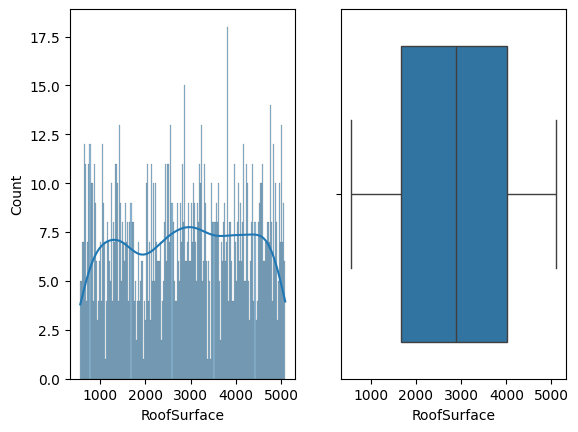

In [196]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, (ax1,ax2) = plt.subplots(1,2)
sns.histplot(data["RoofSurface"], bins=200, kde=True,  ax=ax1);
sns.boxplot(data=data, x='RoofSurface',  ax=ax2);

👉 Since RoofSurface has neither a Gaussian distribution, nor outliers  → MinMaxScaler.

In [197]:
from sklearn.preprocessing import MinMaxScaler
minmax_scaler = MinMaxScaler()
data[["RoofSurface"]] = minmax_scaler.fit_transform(data[["RoofSurface"]])
MinMaxScaler()

MinMaxScaler()

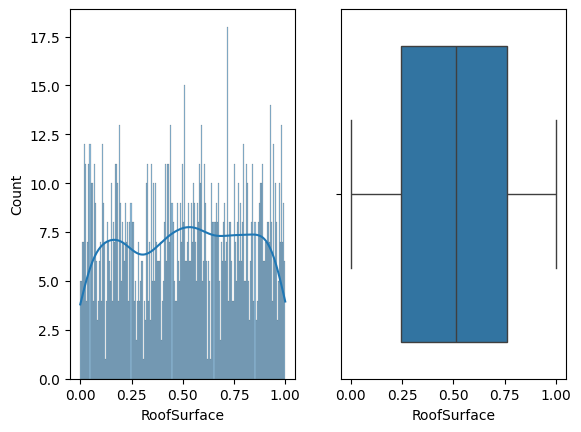

In [198]:
fig, (ax1,ax2) = plt.subplots(1,2)
sns.histplot(data["RoofSurface"], bins=200, kde=True,  ax=ax1);
sns.boxplot(data=data, x='RoofSurface',  ax=ax2);

###  GrLivArea

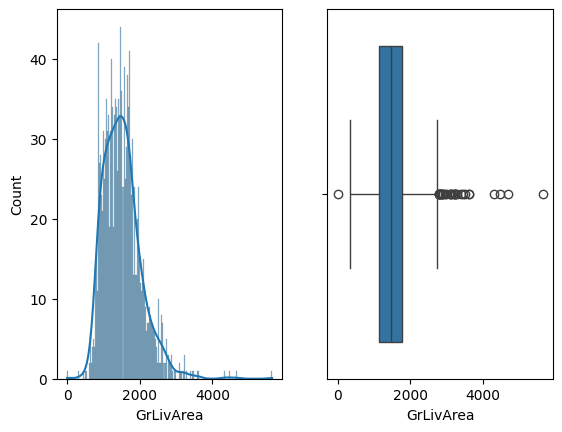

In [199]:
fig, (ax1,ax2) = plt.subplots(1,2)
sns.histplot(data["GrLivArea"], bins=200, kde=True,  ax=ax1);
sns.boxplot(data=data, x='GrLivArea',  ax=ax2);

👉 GrLivArea has many outliers  → RobustScaler()

In [200]:
from sklearn.preprocessing import RobustScaler
rb_scaler = RobustScaler()
rb_scaler.fit(data[["GrLivArea"]])
data["GrLivArea"] = rb_scaler.transform(data[["GrLivArea"]])
data.head()

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,GarageFinish,CentralAir,MoSold,SalePrice
0,0.380070,3,1,5,0.316729,RFn,Y,2,208500
1,-0.312090,3,1,8,0.069650,RFn,Y,5,181500
2,0.497489,3,1,5,0.228124,RFn,Y,9,223500
3,0.390885,3,1,5,0.442583,Unf,Y,2,140000
4,1.134029,4,1,5,0.566894,RFn,Y,12,250000


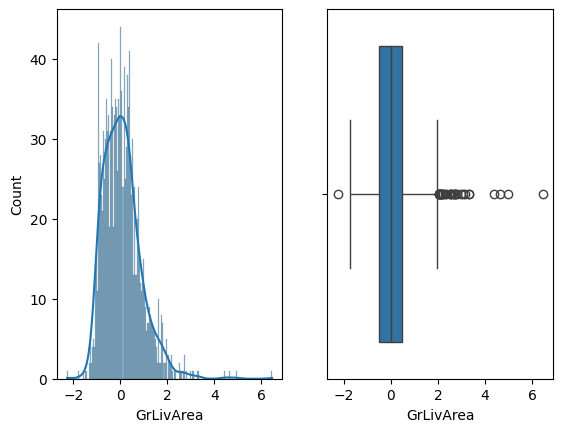

In [201]:
fig, (ax1,ax2) = plt.subplots(1,2)
sns.histplot(data["GrLivArea"], bins=200, kde=True,  ax=ax1);
sns.boxplot(data=data, x='GrLivArea',  ax=ax2);

### BedroomAbvGr, OverallCond, KitchenAbvGr

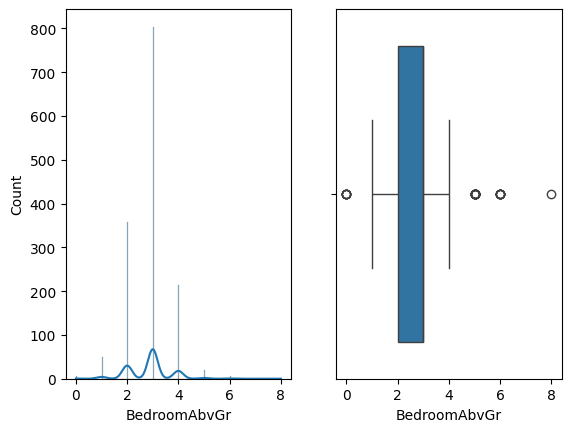

In [202]:
fig, (ax1,ax2) = plt.subplots(1,2)
sns.histplot(data["BedroomAbvGr"], bins=200, kde=True,  ax=ax1);
sns.boxplot(data=data, x='BedroomAbvGr',  ax=ax2);

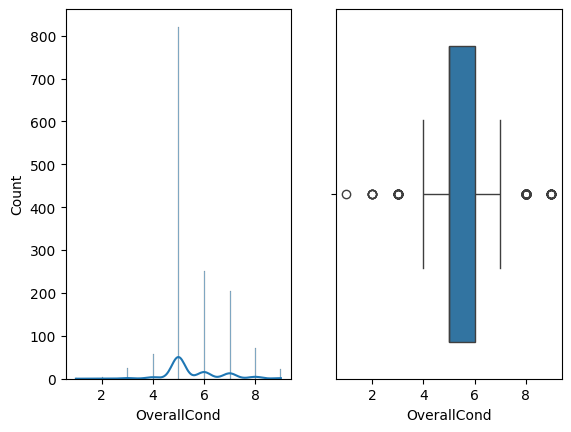

In [203]:
fig, (ax1,ax2) = plt.subplots(1,2)
sns.histplot(data["OverallCond"], bins=200, kde=True,  ax=ax1);
sns.boxplot(data=data, x='OverallCond',  ax=ax2);

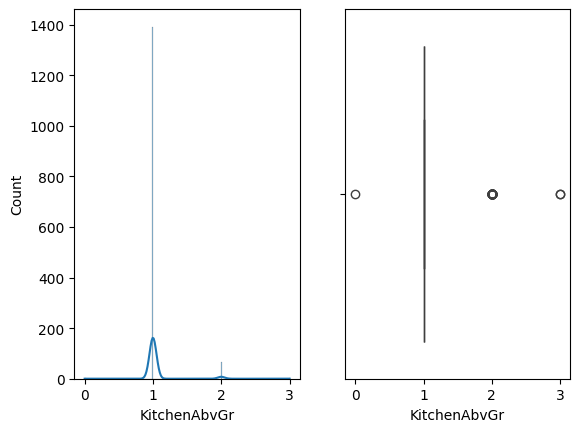

In [204]:
fig, (ax1,ax2) = plt.subplots(1,2)
sns.histplot(data["KitchenAbvGr"], bins=200, kde=True,  ax=ax1);
sns.boxplot(data=data, x='KitchenAbvGr',  ax=ax2);

👉 BedroomAbvGr , OverallCond & KitchenAbvGr are ordinal features. There are less than 0.1% of outliers so no need to use RobustScaler(). The distribution is not Gaussian, hence no StandardScaler(). 

In [205]:
minmax_scaler = MinMaxScaler()
data[["GrLivArea"]] = minmax_scaler.fit_transform(data[["GrLivArea"]])
MinMaxScaler()

MinMaxScaler()

In [206]:
minmax_scaler = MinMaxScaler()
data[["OverallCond"]] = minmax_scaler.fit_transform(data[["OverallCond"]])
MinMaxScaler()

MinMaxScaler()

In [207]:
minmax_scaler = MinMaxScaler()
data[["KitchenAbvGr"]] = minmax_scaler.fit_transform(data[["KitchenAbvGr"]])
MinMaxScaler()

MinMaxScaler()

In [208]:
data.describe()

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,MoSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,0.268607,2.866438,0.348858,0.571918,0.508090,6.321918,180921.195890
std,0.093360,0.815778,0.073446,0.139100,0.291582,2.703626,79442.502883
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,34900.000000
25%,0.200337,2.000000,0.333333,0.500000,0.246143,5.000000,129975.000000
50%,0.259614,3.000000,0.333333,0.500000,0.513776,6.000000,163000.000000
75%,0.315036,3.000000,0.333333,0.625000,0.761406,8.000000,214000.000000
max,1.000000,8.000000,1.000000,1.000000,1.000000,12.000000,755000.000000


## Feature Encoding

### GarageFinish

👉GarageFinish is a multicategorical feature that should be One-hot-encoded. You could also consider an Ordinal Encoding but we would have to know for sure that Unfinished or no garage are definitely worse that rough finished!

In [209]:
from sklearn.preprocessing import OneHotEncoder

# Check unique values for GarageFinish
print(f"The unique values for 'GarageFinish' are {data.GarageFinish.unique()}")

# Instantiate the OneHotEncoder
GarageFinish_ohe = OneHotEncoder(sparse_output = False) 

# Fit encoder
GarageFinish_ohe.fit(data[['GarageFinish']]) 

# Display the detected categories
print(f"The categories detected by the OneHotEncoder are {GarageFinish_ohe.categories_}")

The unique values for 'GarageFinish' are ['RFn' 'Unf' 'Fin' 'NoGarage']
The categories detected by the OneHotEncoder are [array(['Fin', 'NoGarage', 'RFn', 'Unf'], dtype=object)]


In [210]:
GarageFinish_ohe.get_feature_names_out()

array(['GarageFinish_Fin', 'GarageFinish_NoGarage', 'GarageFinish_RFn',
       'GarageFinish_Unf'], dtype=object)

In [211]:
# Display the generated names
print(f"The column names for the encoded values are {GarageFinish_ohe.get_feature_names_out()}")

# Transform the current "GarageFinish" column
data[GarageFinish_ohe.get_feature_names_out()] = GarageFinish_ohe.transform(data[['GarageFinish']])

# Drop the column "GarageFinish" which has been encoded
data.drop(columns = ["GarageFinish"], inplace = True)

# Show the dataset
data.head(3)

The column names for the encoded values are ['GarageFinish_Fin' 'GarageFinish_NoGarage' 'GarageFinish_RFn'
 'GarageFinish_Unf']


,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,CentralAir,MoSold,SalePrice,GarageFinish_Fin,GarageFinish_NoGarage,GarageFinish_RFn,GarageFinish_Unf
0,0.303208,3,0.333333,0.500,0.316729,Y,2,208500,0.0,0.0,1.0,0.0
1,0.223817,3,0.333333,0.875,0.069650,Y,5,181500,0.0,0.0,1.0,0.0
2,0.316676,3,0.333333,0.500,0.228124,Y,9,223500,0.0,0.0,1.0,0.0


### CentralAir

👉CentralAir is a binary categorical feature.

In [212]:
# Check unique values for CentralAir 
print(f"The unique values for 'CentralAir' are {data.CentralAir.unique()}")

# Instantiate the OneHotEncoder
CentralAir_ohe = OneHotEncoder(drop='if_binary', sparse_output = False) 

# Fit encoder
CentralAir_ohe.fit(data[['CentralAir']]) 

# Display the detected categories
print(f"The categories detected by the OneHotEncoder are {CentralAir_ohe.categories_}")

The unique values for 'CentralAir' are ['Y' 'N']
The categories detected by the OneHotEncoder are [array(['N', 'Y'], dtype=object)]


In [213]:
CentralAir_ohe.get_feature_names_out()

array(['CentralAir_Y'], dtype=object)

In [214]:
# Display the generated names
print(f"The column names for the encoded values are {CentralAir_ohe.get_feature_names_out()}")

# Transform the current "CentralAir" column
data[CentralAir_ohe.get_feature_names_out()] = CentralAir_ohe.transform(data[['CentralAir']])

# Drop the column "CentralAir" which has been encoded
data.drop(columns = ["CentralAir"], inplace = True)

# Show the dataset
data.head(3)

The column names for the encoded values are ['CentralAir_Y']


,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,MoSold,SalePrice,GarageFinish_Fin,GarageFinish_NoGarage,GarageFinish_RFn,GarageFinish_Unf,CentralAir_Y
0,0.303208,3,0.333333,0.500,0.316729,2,208500,0.0,0.0,1.0,0.0,1.0
1,0.223817,3,0.333333,0.875,0.069650,5,181500,0.0,0.0,1.0,0.0,1.0
2,0.316676,3,0.333333,0.500,0.228124,9,223500,0.0,0.0,1.0,0.0,1.0


In [215]:
print(f"The unique values for 'CentralAir' are {data.CentralAir_Y.unique()}")

The unique values for 'CentralAir' are [1. 0.]


## Feature Engineering

### MoSold - Cyclical engineering
👨🏻‍🏫 A feature can be temporal (e.g. quarters, months, days, minutes, ...).

Cyclical features like time need some specific preprocessing. Indeed, if you want any Machine Learning algorithm to capture this cyclicity, your cyclical features must be preprocessed in a certain way.

👉 Consider the feature MoSold, the month on which the house was sold.

In [216]:
data["MoSold"].value_counts()

MoSold
6     253
7     234
5     204
4     141
8     122
3     106
10     89
11     79
9      63
12     59
1      58
2      52
Name: count, dtype: int64

* Many houses were sold in June (6), July (7) and May (5) (Spring/Summer)
* Only a few houses were sold in December (12), January (1) and February (2) (~ Fall/Winter)
* But for any Machine Learning model, there is no reason why December (12) and January (1) would be "close"...

👩🏻‍🏫 ***How to deal with cyclical features?***

1.  Look at the following illustration and read the explanations to distinguish two different months.

<img src="https://wagon-public-datasets.s3.amazonaws.com/05-Machine-Learning/02-Prepare-the-dataset/cyclical_feature_engineering.png" alt="Cyclical features" width="1000">


2. Read this [article](https://ianlondon.github.io/blog/encoding-cyclical-features-24hour-time/) for more details.




<details>
    <summary>💡 <i>Hint</i></summary>
    
To create a time engineered feature based on a column which gives the second in the day!
```python
seconds_in_day = 24*60*60

df['sin_time'] = np.sin(2*np.pi*df.seconds/seconds_in_day)
df['cos_time'] = np.cos(2*np.pi*df.seconds/seconds_in_day)
df.drop(columns=['seconds'], inplace=True)

df.head()
```


</details>

In [217]:
months_in_year = 12

data['sin_MoSold'] = np.sin(2*np.pi*data.MoSold/months_in_year)
data['cos_MoSold'] = np.cos(2*np.pi*data.MoSold/months_in_year)
data.drop(columns=['MoSold'], inplace=True)
data

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,SalePrice,GarageFinish_Fin,GarageFinish_NoGarage,GarageFinish_RFn,GarageFinish_Unf,CentralAir_Y,sin_MoSold,cos_MoSold
0,0.303208,3,0.333333,0.500,0.316729,208500,0.0,0.0,1.0,0.0,1.0,8.660254e-01,5.000000e-01
1,0.223817,3,0.333333,0.875,0.069650,181500,0.0,0.0,1.0,0.0,1.0,5.000000e-01,-8.660254e-01
2,0.316676,3,0.333333,0.500,0.228124,223500,0.0,0.0,1.0,0.0,1.0,-1.000000e+00,-1.836970e-16
3,0.304448,3,0.333333,0.500,0.442583,140000,0.0,0.0,0.0,1.0,1.0,8.660254e-01,5.000000e-01
4,0.389686,4,0.333333,0.500,0.566894,250000,0.0,0.0,1.0,0.0,1.0,-2.449294e-16,1.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.292043,3,0.333333,0.500,0.251267,175000,0.0,0.0,1.0,0.0,1.0,-8.660254e-01,-5.000000e-01
1456,0.367535,3,0.333333,0.625,0.459996,210000,0.0,0.0,0.0,1.0,1.0,8.660254e-01,5.000000e-01
1457,0.414850,4,0.333333,1.000,0.036147,266500,0.0,0.0,1.0,0.0,1.0,5.000000e-01,-8.660254e-01
1458,0.191210,2,0.333333,0.625,0.648667,142125,0.0,0.0,0.0,1.0,1.0,8.660254e-01,-5.000000e-01


## Export the preprocessed dataset

In [218]:
data.to_csv("data/clean_dataset.csv", index=False)